# Fake news classification

The spread of fraudulent information is one of the most serious issues we face today. Most of the time, this material is given under the pretence of journalism. The internet and social media make it simple to disseminate such knowledge, and it has influenced many people today by changing or attempting to modify their opinions about many topics. False information or fake news can be classified using a variety of methods. To detect false news, this thesis used the Random Forest model as a classifier and CountVectorizer as a feature extractor. The performance of six additional machine learning algorithms was also examined in this thesis. To analyse the outcomes of these investigations, four assessment approaches are employed. The study's findings demonstrate that each of the seven methods has a distinct performance. One of these methods has shown to be the most effective for identifying misleading information or fake news.

In [1]:
# Importing all the necessary library that is needed for this work.
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
# Importation of the dataset
news = pd.read_csv('C:/Users/timot/Downloads/news.csv')

In [3]:
#To see the shape of the Dataset
news.shape

(6335, 4)

In [4]:
#To see the headings of the dataset
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


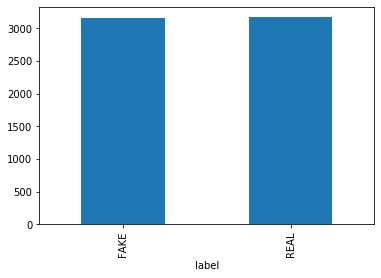

In [5]:
# Plotting the Real and Fake news in the dataset to see the normality 
print(news.groupby(['label'])['text'].count())
news.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [6]:
# To view the dataset
labels=news.label
news.label.value_counts()
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
#Dropping the unwanted columns 
news["text"] = news["title"] + " "+ news["text"]
news.drop(["Unnamed: 0","title"], axis = 1)

,text,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy U....,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matte...,REAL
...,...,...
6330,State Department says it can't find emails fro...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...",REAL


In [8]:
# Importing stopword 
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#Data Cleaning 
import re
import string
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.PorterStemmer()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

news['body_len'] = news['text'].apply(lambda x: len(x) - x.count(" "))
news['punct%'] = news['text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [stemmer.stem(word) for word in tokens if word not in stopwords]
    return text

In [10]:
#Data spliting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
#Initialization of the feature extraction, that is vectorizer
start_time = datetime.now()
count_vectorizer=CountVectorizer(stop_words='english', max_df=0.9, analyzer=clean_text)
count_vectorizer_fit=count_vectorizer.fit(X_train['text']) 
count_train = count_vectorizer_fit.transform(X_train['text'])
count_test = count_vectorizer_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(count_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(count_test.toarray())], axis=1)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

C:\Users\timot\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:502: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


Duration: 0:02:48.613257


In [12]:
# Displaying the outcome of the feature extraction
X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,51094,51095,51096,51097,51098,51099,51100,51101,51102,51103
0,4481,3.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9474,3.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6744,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7358,2.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5094,4.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Importing and Initiating Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
RDF=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

In [14]:
# fitting and predicting the accuracy
start_time = datetime.now()
RDF.fit(count_train,y_train)
y_pred=RDF.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 90.74%
Duration: 0:00:04.595555


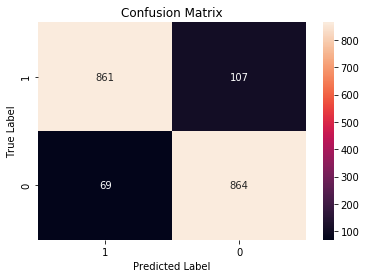

In [15]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.89      0.91       968
        REAL       0.89      0.93      0.91       933

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



In [17]:
# Importing and Initiating Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [18]:
# fitting and predicting the accuracy
start_time = datetime.now()
gb_clf.fit(count_train,y_train)
y_pred=gb_clf.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 91.9%
Duration: 0:00:22.037287


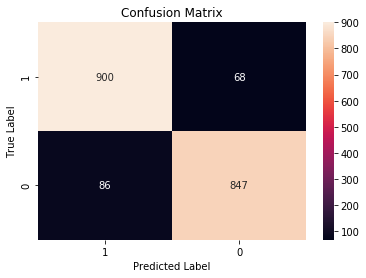

In [19]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.93      0.92       968
        REAL       0.93      0.91      0.92       933

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



In [63]:
# Importing and Initiating Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()

In [64]:
# fitting and predicting the accuracy
start_time = datetime.now()
pac.fit(count_train,y_train)
y_pred=pac.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 91.06%
Duration: 0:00:00.336425


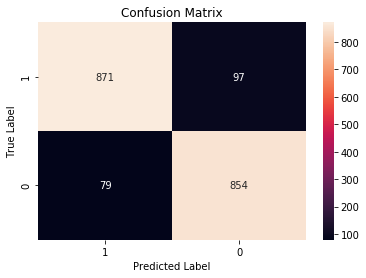

In [23]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.92      0.90      0.91       968
        REAL       0.90      0.92      0.91       933

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



In [25]:
# Importing and Initiating Support Vector Machine Classifier
from sklearn import svm
SVM = svm.SVC(C=1.05, kernel = 'linear', degree = 3, gamma = 'auto')

In [26]:
# fitting and predicting the accuracy
start_time = datetime.now()
SVM.fit(count_train,y_train)
y_pred=SVM.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 89.69%
Duration: 0:00:19.708089


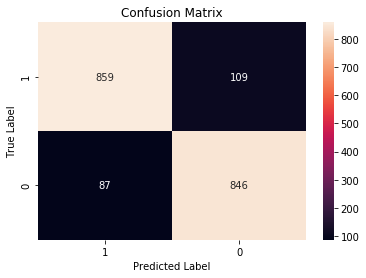

In [27]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.89      0.90       968
        REAL       0.89      0.91      0.90       933

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



In [29]:
# Importing and Initiating Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
LRC= LogisticRegression()

In [30]:
# fitting and predicting the accuracy
start_time = datetime.now()
LRC.fit(count_train,y_train)
y_pred=LRC.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 92.06%
Duration: 0:00:02.005407


C:\Users\timot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


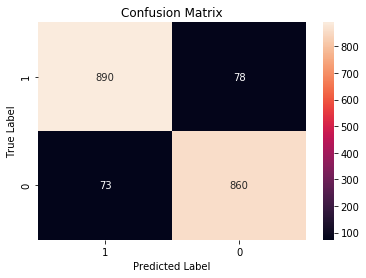

In [31]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       968
        REAL       0.92      0.92      0.92       933

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



In [33]:
# Importing and Initiating AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [34]:
# fitting and predicting the accuracy
start_time = datetime.now()
abc.fit(count_train,y_train)
y_pred=abc.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 89.32%
Duration: 0:00:04.457465


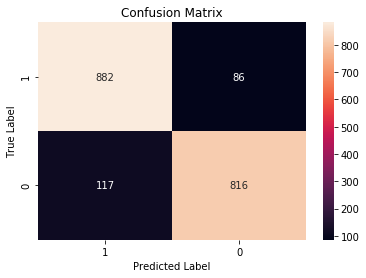

In [35]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.88      0.91      0.90       968
        REAL       0.90      0.87      0.89       933

    accuracy                           0.89      1901
   macro avg       0.89      0.89      0.89      1901
weighted avg       0.89      0.89      0.89      1901



In [37]:
# Importing and Initiating DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion= 'entropy',max_depth = 20,splitter='best',random_state=42)

In [38]:
# fitting and predicting the accuracy
start_time = datetime.now()
DTC.fit(count_train,y_train)
y_pred=DTC.predict(count_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: 81.12%
Duration: 0:00:01.884624


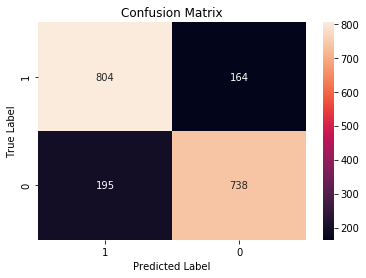

In [39]:
# Plotting the confusion matrix to check th performance of the model
cm = confusion_matrix(y_test, y_pred)
class_label = [1, 0]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
# Displaying Precision, recall, F1-score used in analysing the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.80      0.83      0.82       968
        REAL       0.82      0.79      0.80       933

    accuracy                           0.81      1901
   macro avg       0.81      0.81      0.81      1901
weighted avg       0.81      0.81      0.81      1901



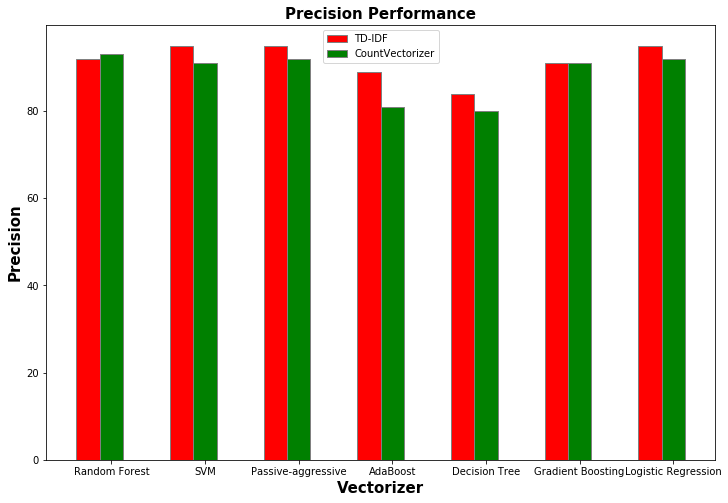

In [46]:
#Plotting graph for precision performance 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar

TDIDF = [92,95,95,89,84,91,95]
CountVectorizer =[93,91,92,81,80,91,92]

# Set position of bar on X axis
br1 = np.arange(len(TDIDF))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, TDIDF, color ='r', width = barWidth,edgecolor ='grey', label ='TD-IDF')
plt.bar(br2, CountVectorizer, color ='g', width = barWidth, edgecolor ='grey', label ='CountVectorizer')
 
# Adding Xticks
plt.title("Precision Performance", fontweight ='bold', fontsize = 15)
plt.xlabel('Vectorizer', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(TDIDF))],
        ["Random Forest", "SVM", "Passive-aggressive", "AdaBoost", "Decision Tree","Gradient Boosting", "Logistic Regression"])
plt.legend()
plt.show()

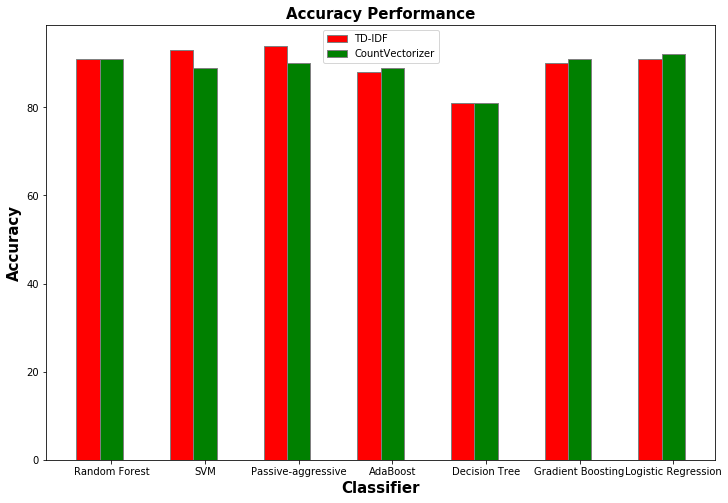

In [47]:
#Plotting graph for Accuracy performance
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
# set height of bar
TDIDF = [91,93,94,88,81,90,91]
CountVectorizer =[91,89,90,89,81,91,92]
 
# Set position of bar on X axis
br1 = np.arange(len(TDIDF))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, TDIDF, color ='r', width = barWidth, edgecolor ='grey', label ='TD-IDF')
plt.bar(br2, CountVectorizer, color ='g', width = barWidth, edgecolor ='grey', label ='CountVectorizer')
 
# Adding Xticks
plt.title("Accuracy Performance", fontweight ='bold', fontsize = 15)
plt.xlabel('Classifier', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(TDIDF))],
        ["Random Forest", "SVM", "Passive-aggressive", "AdaBoost", "Decision Tree","Gradient Boosting", "Logistic Regression"])
 
plt.legend()
plt.show()

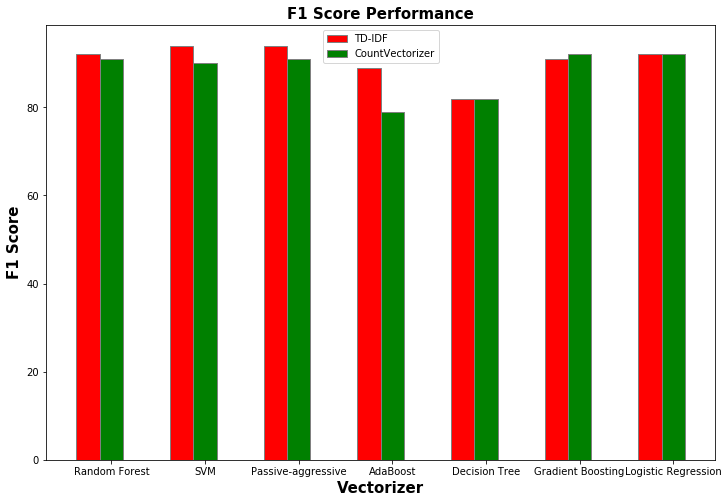

In [48]:
#Plotting graph for F1 Score performance
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar

TDIDF = [92,94,94,89,82,91,92]
CountVectorizer =[91,90,91,79,82,92,92]
 
# Set position of bar on X axis
br1 = np.arange(len(TDIDF))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, TDIDF, color ='r', width = barWidth,
        edgecolor ='grey', label ='TD-IDF')
plt.bar(br2, CountVectorizer, color ='g', width = barWidth,
        edgecolor ='grey', label ='CountVectorizer')
 
# Adding Xticks
plt.title("F1 Score Performance", fontweight ='bold', fontsize = 15)
plt.xlabel('Vectorizer', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(TDIDF))],
        ["Random Forest", "SVM", "Passive-aggressive", "AdaBoost", "Decision Tree","Gradient Boosting", "Logistic Regression"])
 
plt.legend()
plt.show()

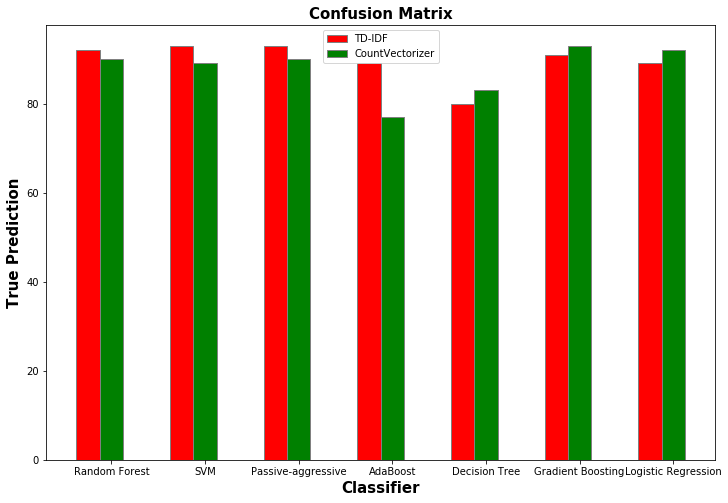

In [51]:
#Plotting Confusion matrix for True prediction performance
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar

TDIDF = [92,93,93,89,80,91,89]
CountVectorizer =[90,89,90,77,83,93,92]
 
# Set position of bar on X axis
br1 = np.arange(len(TDIDF))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, TDIDF, color ='r', width = barWidth,
        edgecolor ='grey', label ='TD-IDF')
plt.bar(br2, CountVectorizer, color ='g', width = barWidth,
        edgecolor ='grey', label ='CountVectorizer')
 
# Adding Xticks
plt.xlabel('Vectorizer', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(TDIDF))],
        ["Random Forest", "SVM", "Passive-aggressive", "AdaBoost", "Decision Tree","Gradient Boosting", "Logistic Regression"])
 
plt.legend()
plt.show()